In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [9]:
data = np.random.randn(1000)

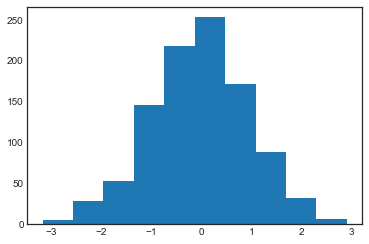

In [10]:
plt.hist(data);

(array([0.00988195, 0.01482292, 0.        , 0.02470487, 0.04940975,
        0.06423267, 0.04940975, 0.08893754, 0.12352437, 0.22234386,
        0.20257996, 0.29645848, 0.2915175 , 0.35575017, 0.42986479,
        0.42986479, 0.40515992, 0.41504187, 0.2915175 , 0.3112814 ,
        0.24210776, 0.18281606, 0.14328826, 0.10870144, 0.07411462,
        0.0395278 , 0.04446877, 0.01482292, 0.00494097, 0.00988195]),
 array([-3.16368245, -2.96129323, -2.75890401, -2.55651479, -2.35412557,
        -2.15173635, -1.94934713, -1.74695791, -1.54456869, -1.34217947,
        -1.13979025, -0.93740103, -0.7350118 , -0.53262258, -0.33023336,
        -0.12784414,  0.07454508,  0.2769343 ,  0.47932352,  0.68171274,
         0.88410196,  1.08649118,  1.2888804 ,  1.49126962,  1.69365884,
         1.89604806,  2.09843728,  2.30082651,  2.50321573,  2.70560495,
         2.90799417]),
 <a list of 1 Patch objects>)

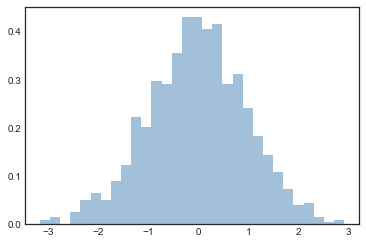

In [12]:
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue',
         edgecolor='none')

In [13]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

(array([0.00286774, 0.        , 0.        , 0.        , 0.00573548,
        0.00860322, 0.00286774, 0.00573548, 0.00860322, 0.02007419,
        0.02294193, 0.03154516, 0.05735483, 0.06595806, 0.08029676,
        0.09176773, 0.10610644, 0.11470966, 0.17779998, 0.14051934,
        0.17206449, 0.20647739, 0.18927094, 0.15485804, 0.22655158,
        0.19213869, 0.16059353, 0.15485804, 0.12331289, 0.10897418,
        0.06022257, 0.05735483, 0.03728064, 0.02867742, 0.01720645,
        0.01147097, 0.00573548, 0.00860322, 0.00573548, 0.00286774]),
 array([-4.80974996, -4.4610435 , -4.11233704, -3.76363059, -3.41492413,
        -3.06621767, -2.71751122, -2.36880476, -2.02009831, -1.67139185,
        -1.32268539, -0.97397894, -0.62527248, -0.27656602,  0.07214043,
         0.42084689,  0.76955334,  1.1182598 ,  1.46696626,  1.81567271,
         2.16437917,  2.51308563,  2.86179208,  3.21049854,  3.559205  ,
         3.90791145,  4.25661791,  4.60532436,  4.95403082,  5.30273728,
         5.65144

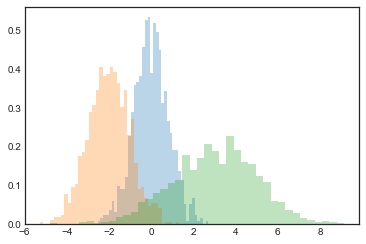

In [14]:
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [16]:
counts, bin_edges = np.histogram(data, bins=10)
print(counts)

[  5  28  53 146 218 253 171  88  32   6]


In [17]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

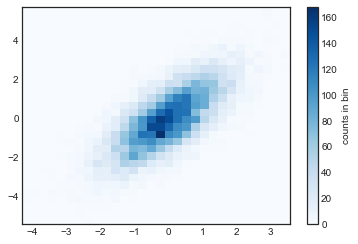

In [18]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin') # Количествво в интервале

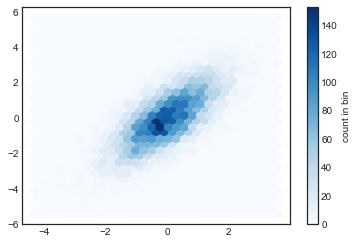

In [19]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin') # Количество в интервале

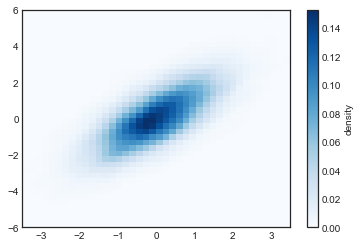

In [20]:
from scipy.stats import gaussian_kde
# Выполняем подбор на массиве размера [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)
# Вычисляем на регулярной координатной сетке
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
# Выводим график результата в виде изображения
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label("density") # Плотность